# cab_rides

## A new ride-sharing company that's launching in Chicago. The task is to find patterns in the available information, understanding passenger preferences and the impact of external factors on rides.



# Description of the data

### A database with info on taxi rides in Chicago:

- neighborhoods table: data on city neighborhoods

- name: name of the neighborhood
- neighborhood_id: neighborhood code
- cabs table: data on taxis

- cab_id: vehicle code
- vehicle_id: the vehicle's technical ID
- company_name: the company that owns the vehicle
- trips table: data on rides

- trip_id: ride code
- cab_id: code of the vehicle operating the ride
- start_ts: date and time of the beginning of the ride (time rounded to the hour)
- end_ts: date and time of the end of the ride (time rounded to the hour)
- duration_seconds: ride duration in seconds
- distance_miles: ride distance in miles
- pickup_location_id: pickup neighborhood code
- dropoff_location_id: dropoff neighborhood code
- weather_records table: data on weather

- record_id: weather record code
- ts: record date and time (time rounded to the hour)
- temperature: temperature when the record was taken
- description: brief description of weather conditions, e.g. "light rain" or "scattered clouds"

In [7]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
try:
    cabs = pd.read_csv('/Users/elias/Desktop/cab_rides/moved_project_sql_result_01.csv', sep=',')

except FileNotFoundError:
    cabs = pd.read_csv('moved_project_sql_result_01.csv', sep=',')



try:
    trips = pd.read_csv('/Users/elias/Desktop/cab_rides/moved_project_sql_result_04.csv', sep=',')

except FileNotFoundError:
    trips = pd.read_csv('moved_project_sql_result_04.csv', sep=',')



try:
    details = pd.read_csv('/Users/elias/Desktop/cab_rides/moved_project_sql_result_07.csv', sep=',')

except FileNotFoundError:
    details = pd.read_csv('moved_project_sql_result_07.csv', sep=',')



In [11]:
# Check for duplicates
cabs_duplicates = cabs.duplicated().sum()
print(f"Number of duplicate rows: {cabs_duplicates}")

# Check for missing values
cabs_missing_values = cabs.isnull().sum().sum()
print(f"Number of missing values: {cabs_missing_values}")

Number of duplicate rows: 0
Number of missing values: 0


In [13]:
# Check for duplicates
trips_duplicates = trips.duplicated().sum()
print(f"Number of duplicate rows: {trips_duplicates}")

# Check for missing values
trips_missing_values = trips.isnull().sum().sum()
print(f"Number of missing values: {trips_missing_values}")

Number of duplicate rows: 0
Number of missing values: 0


In [16]:
# Check for duplicates
details_duplicates = details.duplicated().sum()
print(f"Number of duplicate rows: {details_duplicates}")

# Check for missing values
details_missing_values = details.isnull().sum().sum()
print(f"Number of missing values: {details_missing_values}")

Number of duplicate rows: 197
Number of missing values: 0


In [17]:
# Remove the duplicates from the 'details' dataframe

new_details= details.drop_duplicates()

#check for duplicates after 
details_without_duplicates = new_details.duplicated().sum()
print(f"Number of duplicate rows: {details_without_duplicates}")

Number of duplicate rows: 0


In [35]:
# the top 10 neighborhoods in terms of drop-offs


top_10 = trips.sort_values(by='average_trips', ascending=False).head(10)
display(top_10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


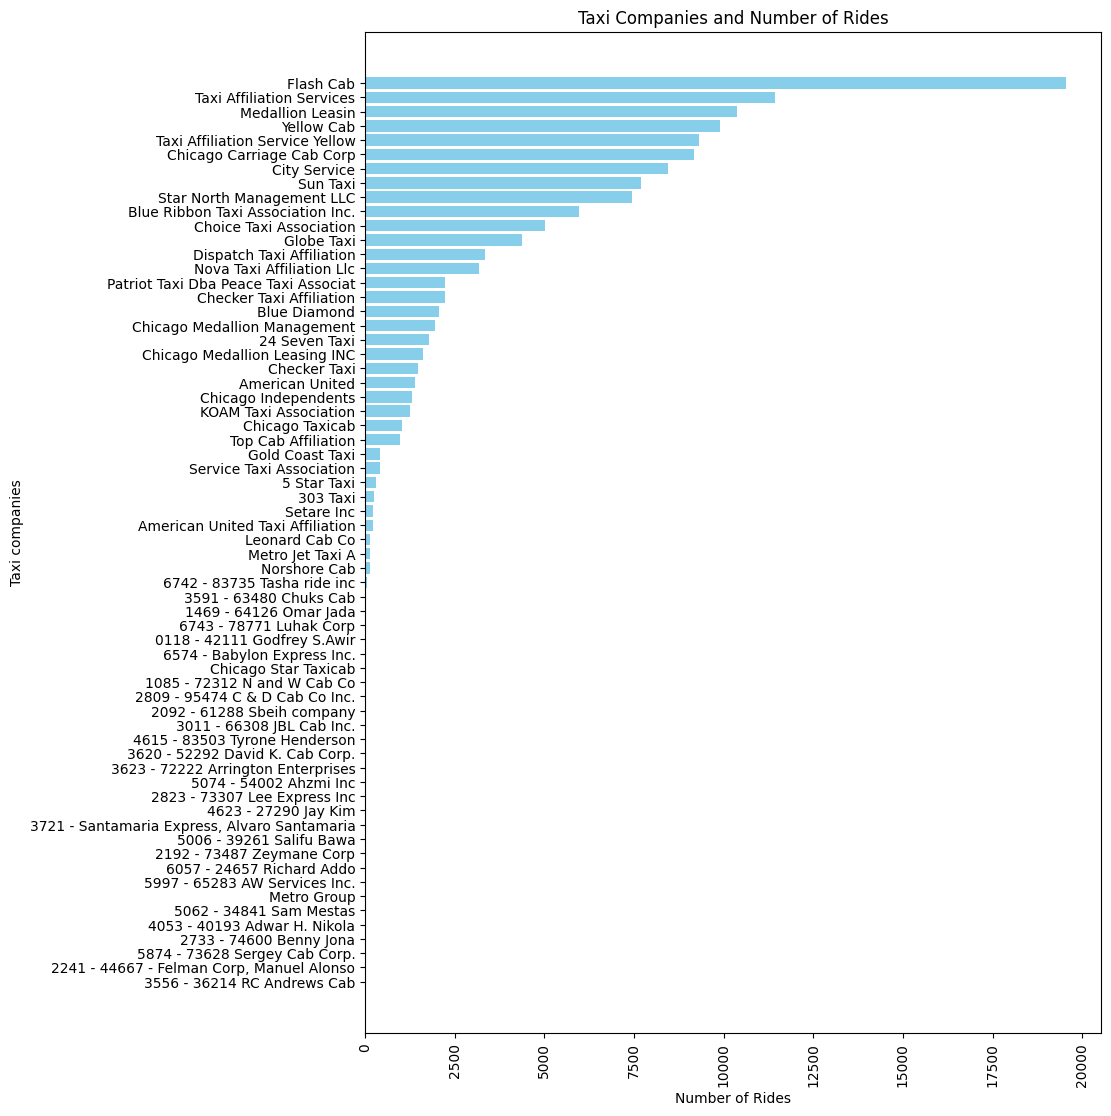

In [33]:
#Taxi Companies and Number of Rides:
cabs_sorted = cabs.sort_values('trips_amount', ascending=True)
# Data for Taxi Companies and Number of Rides
# Plotting the graph
plt.figure(figsize=(9.5,13))
plt.barh(cabs_sorted['company_name'], cabs_sorted['trips_amount'], color='skyblue')
plt.xlabel('Number of Rides')
plt.ylabel('Taxi companies')
plt.title('Taxi Companies and Number of Rides')
plt.xticks(rotation=90)
plt.show()



The first graph shows the Taxi companies and their number of trips, 'Flash cab' is the biggest company per number of rides, more than 19k trips per hour, followed by 'Taxi Affiliation services' and 'Medalion Leasin' with more than 10k trips per hour. 

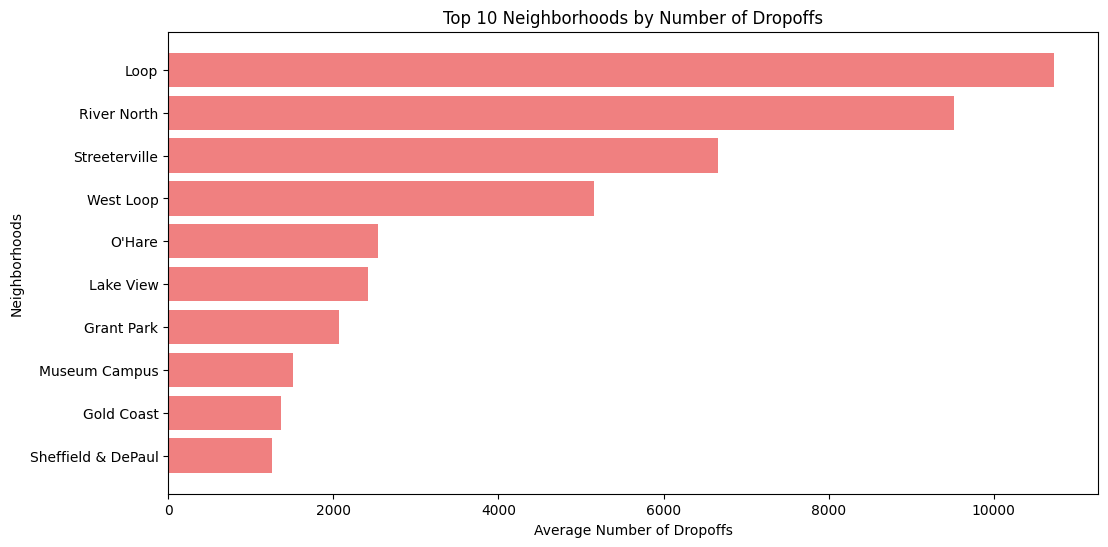

In [39]:
# Top 10 Neighborhoods by Number of Dropoffs:
top_10_sorted = top_10.sort_values('average_trips', ascending=True)
# Data for Top 10 Neighborhoods by Number of Dropoffs

# Plotting the graph
plt.figure(figsize=(12,6))
plt.barh(top_10_sorted['dropoff_location_name'], top_10_sorted['average_trips'], color='lightcoral')
plt.xlabel('Average Number of Dropoffs')
plt.ylabel('Neighborhoods')
plt.title('Top 10 Neighborhoods by Number of Dropoffs')
plt.show()

The second graph shows the top Chicago neighborhoods with the most drop-offs, Loop has the most trips with more than 10k drop-offs per hour, followed by River North, Streeterville, and West Loop with more than 5k drop-offs per hour.

In [18]:
# test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays, we can conduct a hypothesis test comparing the average duration of rides on rainy Saturdays to the average duration of rides on non-rainy Saturdays.


#- Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays.
#- Alternative Hypothesis (Ha): The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


# Split the data into two groups
rainy_saturdays = new_details[new_details['weather_conditions'] == 'Bad']
non_rainy_saturdays = new_details[new_details['weather_conditions'] == 'Good']

# Calculate the average duration of rides for each group
avg_duration_rainy = rainy_saturdays['duration_seconds'].mean()
avg_duration_non_rainy = non_rainy_saturdays['duration_seconds'].mean()

# Perform a t-test
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])

# Determine significance
alpha = 0.05
if p_value < alpha:  
    display("The difference in average duration of rides on rainy Saturdays and non-rainy Saturdays is statistically significant.")
else:
    display("There is no statistically significant difference in average duration of rides on rainy Saturdays and non-rainy Saturdays.")


'The difference in average duration of rides on rainy Saturdays and non-rainy Saturdays is statistically significant.'

based on the results of the t-test, we reject the null hypothesis that the average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays. The alternative hypothesis that the average duration of rides changes on rainy Saturdays is supported by the statistical significance of the difference between rainy and non-rainy Saturdays. This suggests that weather conditions, specifically rain, have an impact on the average duration of rides to the airport.

# Conclusion

In conclusion, the analysis of taxi companies, top Chicago neighborhoods for drop-offs, and the impact of weather on ride durations to O'Hare International Airport have provided valuable insights into the transportation landscape in Chicago. The data clearly shows the dominance of certain taxi companies and neighborhoods in terms of trips and drop-offs, as well as the significant effect of rainy weather on ride durations. Overall, these findings can be used to improve transportation services and make informed decisions for both customers and service providers in Chicago.